<a href="https://colab.research.google.com/github/Nhutsang/Baocaogiuaky/blob/main/CNNMoney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy


In [12]:
folder = '/content/drive/MyDrive/TrainAI/Tiengiay/datatrain/'

img_size = 100;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('tien_500k'):
    output = 1.0
  if file.startswith('tien_200k'):
    output = 2.0
  if file.startswith('tien_100k'):
    output = 3.0
  if file.startswith('tien_50k'):
    output = 4.0
  if file.startswith('tien_20k'):
    output = 5.0
  if file.startswith('tien_10k'):
    output = 6.0
  if file.startswith('tien_5k'):
    output = 7.0
  if file.startswith('tien_2k'):
    output = 8.0
  if file.startswith('tien_1k'):
    output = 9.0

  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)

(532, 100, 100, 3) (532,)


In [13]:

photos = photos.astype('float32')/255.0
print(photos.shape)


(532, 100, 100, 3)


In [14]:

(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.20, stratify=labels, random_state=10)

(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=10)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)
     

(318, 100, 100, 3)
(318,)
(107, 100, 100, 3)
(107,)
(107, 100, 100, 3)
(107,)


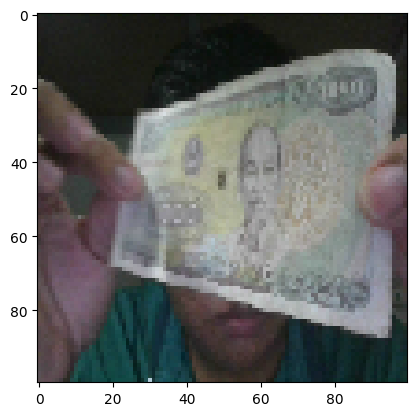

Cái này là:  9.0


In [15]:
image_test= 250
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Cái này là: ', trainY[image_test])
     

In [16]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(318, 10)
(107, 10)
(107, 10)


In [17]:
batch_size=32
epochs= 10
classes = 10

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))
     
# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     


model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [18]:
start = time()
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))
print(time()-start)

Epoch 1/10
10/10 [==============================] - 12s 1s/step - loss: 2.0448 - accuracy: 0.3522 - val_loss: 1.5107 - val_accuracy: 0.5047
Epoch 2/10
10/10 [==============================] - 10s 1s/step - loss: 1.0110 - accuracy: 0.6761 - val_loss: 0.6393 - val_accuracy: 0.8224
Epoch 3/10
10/10 [==============================] - 9s 883ms/step - loss: 0.4334 - accuracy: 0.8679 - val_loss: 0.3161 - val_accuracy: 0.8972
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 0.1240 - accuracy: 0.9654 - val_loss: 0.1364 - val_accuracy: 0.9252
Epoch 5/10
10/10 [==============================] - 14s 1s/step - loss: 0.0992 - accuracy: 0.9686 - val_loss: 0.1545 - val_accuracy: 0.9533
Epoch 6/10
10/10 [==============================] - 8s 829ms/step - loss: 0.0431 - accuracy: 0.9969 - val_loss: 0.0487 - val_accuracy: 0.9813
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 0.0325 - accuracy: 0.9937 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 8/10
10/10

In [19]:
model.save('/content/drive/MyDrive/TrainAI/Tiengiay/modelmoney')

Text(0.5, 0, 'Epoch')

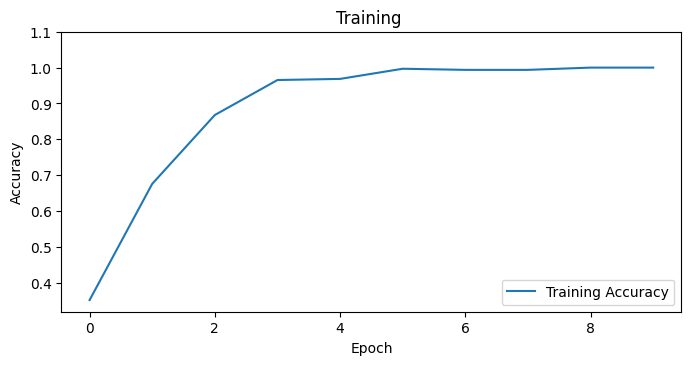

In [20]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training ')
plt.xlabel('Epoch')

1/1 [==============================] - 0s 122ms/step
Predicted:  tiền 50k


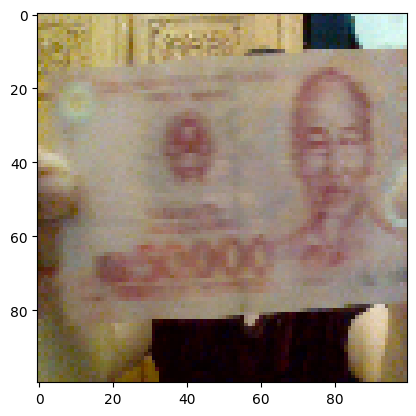

In [21]:
name= {1:'tiền 500k', 2:'tiền 200k',3:'tiền 100k',4:'tiền 50k',5:'tiền 20k', 6:'tiền 10k',7:'tiền 5k',8:'tiền 2k',9:'tiền 1k'}  
#test
filePath = '/content/drive/MyDrive/TrainAI/Tiengiay/Check/10.png'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)

In [22]:
# Tạo một mảng các chỉ số ngẫu nhiên
random_indices = np.random.choice(len(testX), size=100, replace=False)

# Lấy ra 30 mẫu ngẫu nhiên từ tập dữ liệu testX và testY
random_testX = testX[random_indices]
random_testY = testY[random_indices]

# Dùng mô hình để dự đoán nhãn của các mẫu trong tập dữ liệu ngẫu nhiên
results = model.predict(random_testX)
predicted_labels = np.argmax(results, axis=1)

from sklearn.metrics import accuracy_score
# tính độ chính xác 
accuracy = accuracy_score(np.argmax(random_testY, axis=1), predicted_labels)
print("Accuracy:", accuracy*100,"%")

4/4 [==============================] - 1s 163ms/step
Accuracy: 100.0 %
